# TSF Grip Task For Data Science & Business Analytics 
Prediction using Supervised ML

## TASK : 
Predict the percentage of a student based on the no. of study hours.

## Author : Ishita Gupta

In [4]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#Fetching The Data From The Data Set
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data Fetched Successfully")

s_data.head(5) #printing the first 5 rows from the dataset to check the whether the data has been fetched properly or not

Data Fetched Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


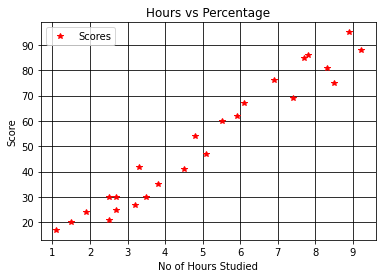

In [5]:
#plotting the scattered graph for analying the data set and identify the algorithm to be applied
s_data.plot(x='Hours', y='Scores', style='*',color='r') 
plt.title('Hours vs Percentage')  
plt.xlabel('No of Hours Studied')  
plt.ylabel('Score') 
plt.grid(True,color='k')
plt.legend()
plt.show()

Training completed


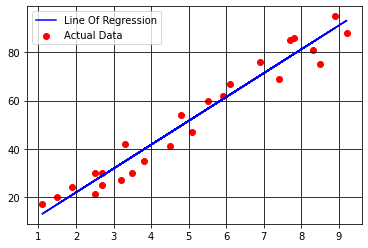

In [6]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

from sklearn.model_selection import train_test_split  
trainX, testX, trainY, testY = train_test_split(X, y, 
                            test_size=0.2, random_state=0)
#training the dataset
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(trainX,trainY) 
print("Training completed")

# Plotting the line of regression
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='r',label='Actual Data')
plt.plot(X, line,color='b',label='Line Of Regression');
plt.legend()
plt.grid(True,color='k')
plt.show()

In [7]:
#Testing the data set
print(testX)
#Predicting the score
predictedY = regressor.predict(testX) 
# Comparing the accuraccy of the prediction
df = pd.DataFrame({'Actual': testY, 'Predicted': predictedY})  
df 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


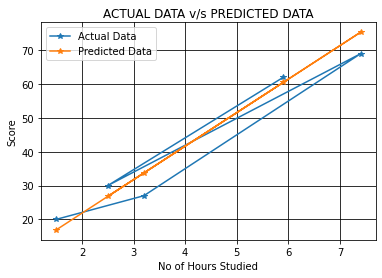

In [8]:
#plotting the Line graph of Actual v/s Predicted data
plt.plot(testX,testY,label="Actual Data",marker='*')
plt.plot(testX,predictedY,label="Predicted Data",marker='*')
plt.title("ACTUAL DATA v/s PREDICTED DATA")
plt.xlabel("No of Hours Studied")
plt.ylabel("Score")
plt.legend()
plt.grid(True,color='k')
plt.show()

In [9]:
#Calculate the average no of hours studied by the students with more than 80%
avg=0
count=0
for i in range(0,len(y)):
    if y[i] > 80:
        avg+=X[i]
        count+=1
avg/=count
print(avg)

[8.38]


In [15]:
#Predict the percentage of an student based on the no. of study hours.
#hours = float(input("Enter The Number Of Hours You Study : "))
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
if own_pred[0]<80:
    print("You have a score of less than 80%")
    print("You Should Study",avg-hours,"hours more In Order To Get More Than 80% !!")
else :
    print("The Number Of Hours You Study Is Sufficient To Maintain A Score Of More Than 80% !!")

No of Hours = 9.25
Predicted Score = 93.69173248737538
The Number Of Hours You Study Is Sufficient To Maintain A Score Of More Than 80% !!


In [16]:
#Predict the percentage of an student based on the no. of study hours.
hours = float(input("Enter The Number Of Hours You Study : "))
test=np.array([hours])
test=test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
if own_pred[0]<80:
    print("You have a score of less than 80%")
    print("You Should Study",avg-hours,"hours more In Order To Get More Than 80% !!")
else :
    print("The Number Of Hours You Study Is Sufficient To Maintain A Score Of More Than 80% !!")

Enter The Number Of Hours You Study : 2
No of Hours = 2.0
Predicted Score = 21.839473002719156
You have a score of less than 80%
You Should Study [6.38] hours more In Order To Get More Than 80% !!


In [12]:
#Calculating The Mean Absolute Error To Measure The Accuracy Of The Data Model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(testY, predictedY))

Mean Absolute Error: 4.183859899002975
